In [1]:
import pandas as np
import numpy as np1 
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import svm, datasets, metrics
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = np.read_csv("education.csv")
df_1 = np.read_csv("educnorma.csv",index_col=0)

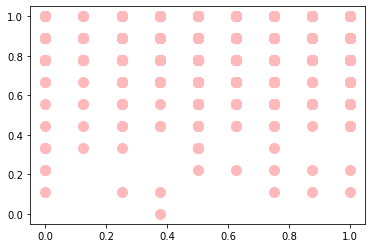

In [3]:
fig = plt.figure()
ax  = fig.add_subplot(111)

plt.scatter(df_1['performance_online'], df_1['Note_avant'] , color='#FFB9BA', marker='o', s = 100)
plt.show()

In [4]:
df_1.drop(["Satisfaction_online_Average","Satisfaction_online_Bad", "Satisfaction_online_Good"],axis=1,inplace=True)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1033 entries, 0 to 1032
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           1033 non-null   float64
 1   nb_subjets                    1033 non-null   float64
 2   Family_size                   1033 non-null   float64
 3   Internet                      1033 non-null   float64
 4   Study                         1033 non-null   float64
 5   Sleep                         1033 non-null   float64
 6   Media                         1033 non-null   float64
 7   Note_avant                    1033 non-null   float64
 8   Online_mode                   1033 non-null   float64
 9   doubts_online                 1033 non-null   float64
 10  performance_online            1033 non-null   float64
 11  Gender_Male                   1033 non-null   int64  
 12  Home_location_Urban           1033 non-null   int64  
 13  Edu

In [5]:
y = df["Performance in online"].copy()

for i in range (len(y)):
    if y[i] < 7: y[i]= 0
    else : y[i]=1

df_1.drop(["performance_online"],axis=1,inplace=True)
y

0       0
1       0
2       0
3       0
4       0
       ..
1028    1
1029    1
1030    0
1031    0
1032    1
Name: Performance in online, Length: 1033, dtype: int64

In [6]:
#Generate training, testing and validation:
import math
from random import seed, shuffle
SEED = 1122334455
seed(SEED) # set the random seed so that the random permutations can be reproduced again
np1.random.seed(SEED)

X_syn = df_1.to_numpy(copy=True)
y_syn = y.to_numpy(copy=True)


n=np1.shape(X_syn)[0]
n_train=int(0.4*n)


X_syn_training=X_syn[0:n_train,:]
y_syn_training=y_syn[0:n_train]

X_syn_testing=X_syn[n_train:(n_train+math.floor((n-n_train)/2)),:]
y_syn_testing=y_syn[n_train:(n_train+math.floor((n-n_train)/2))]

X_syn_validation=X_syn[(n_train+math.floor((n-n_train)/2)):n,:]
y_syn_validation=y_syn[(n_train+math.floor((n-n_train)/2)):n]

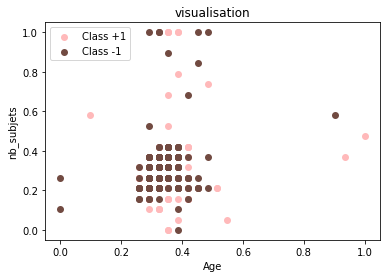

In [8]:
plt.scatter(X_syn_training[y_syn_training==1][:, 0], X_syn_training[y_syn_training==1][:, 1], color='#FFB9BA', marker='o', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_syn_training[y_syn_training==0][:, 0], X_syn_training[y_syn_training==0][:, 1], color='#714A41', marker='o', s=30, linewidth=1.5, label = "Class -1")


plt.legend(loc=2, fontsize=10)
plt.title('visualisation')
plt.xlabel('Age')
plt.ylabel('nb_subjets')


plt.show()

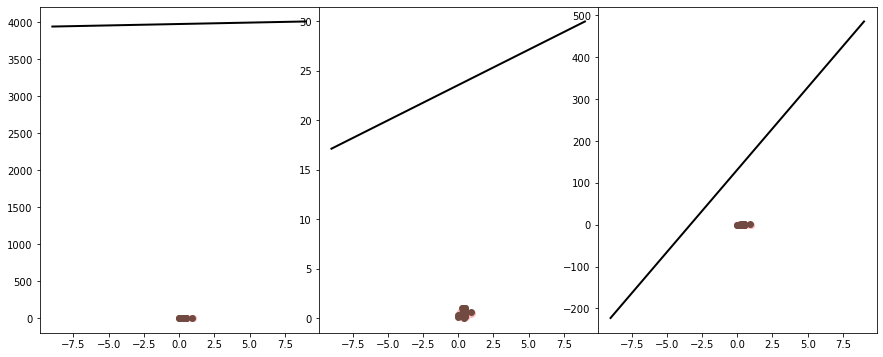

In [8]:
# SVM Classifier model
#the hyperparameter C control the margin violations
#smaller C leads to more margin violations but wider margin
fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()
C_i=[0.001,1,10000]
C_range=np1.shape(C_i)[0]
Accuracy_training=np1.empty([C_range])
mse_training=np1.empty([C_range])
Accuracy_testing=np1.empty([C_range])
Accuracy_validation=np1.empty([C_range])
for i in range(C_range):
    
    #axs[i].contourf(np1.random.rand(10,10),5,cmap=plt.cm.Oranges)
    #axs[i].set_title(str(250+i))
    
    svm_clf = SVC(kernel="linear", C=C_i[i])
    svm_clf.fit(X_syn_training, y_syn_training)

    
    axs[i].scatter(X_syn_training[y_syn_training==1][:, 0], X_syn_training[y_syn_training==1][:, 1], color='#FFB9BA', marker='o', s=30, linewidth=1.5, label= "Class +1")
    axs[i].scatter(X_syn_training[y_syn_training==0][:, 0], X_syn_training[y_syn_training==0][:, 1], color='#714A41', marker='o', s=30, linewidth=1.5, label = "Class -1")
    #plot_svc_decision_boundary(svm_clf, -2, 2)
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np1.linspace(-9, 9, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    axs[i].plot(x0, decision_boundary, "k-", linewidth=2)
    
    y_pred_training=svm_clf.predict(X_syn_training)
    y_pred_testing=svm_clf.predict(X_syn_testing)
    y_pred_validation=svm_clf.predict(X_syn_validation)

 
    Accuracy_training[i]=(metrics.accuracy_score(y_syn_training, y_pred_training)*100)
    Accuracy_testing[i]=(metrics.accuracy_score(y_syn_testing, y_pred_testing)*100)
    Accuracy_validation[i]=(metrics.accuracy_score(y_syn_validation, y_pred_validation)*100)
    
    
plt.show() 

In [9]:
print("\t\t     C_1 C_2 C_3")
print("Accuracy training  ",Accuracy_training)
print("Accuracy testing   ",Accuracy_testing)
print("Accuracy validation",Accuracy_validation)

		     C_1 C_2 C_3
Accuracy training   [52.05811138 72.39709443 72.39709443]
Accuracy testing    [53.5483871  67.09677419 65.80645161]
Accuracy validation [57.41935484 68.70967742 67.74193548]


SVC(C=10, kernel='linear')
Accuracy of 66.10


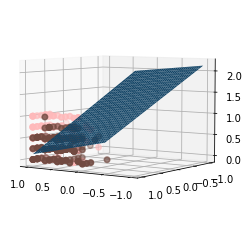

In [10]:
Y1 = y_syn
fig = plt.figure()
xx=3
yy=7
zz=9
ax  = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_syn_training[y_syn_training==1][:, xx], X_syn_training[y_syn_training==1][:, yy], X_syn_training[y_syn_training==1][:, zz],color='#FFB9BA', marker='o', s=30, linewidth=1.5)
ax.scatter3D(X_syn_training[y_syn_training==0][:, xx], X_syn_training[y_syn_training==0][:, yy], X_syn_training[y_syn_training==0][:, zz],color='#714A41', marker='o', s=30, linewidth=1.5)



X1_PRO=np1.c_[X_syn_training[:, xx], X_syn_training[:, yy], X_syn_training[:, zz]]

model = svm.SVC(kernel='linear', C=10)
Y1 = y_syn_training

clf = model.fit(X1_PRO, Y1)
print(clf)

z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]
tmp = np1.linspace(-1,1,30)
x,y = np1.meshgrid(tmp,tmp)
ax.plot_surface(x, y, z(x,y))

ax.view_init(5, 125)

y_pred=clf.predict(X1_PRO)
print("Accuracy of %.2f" %(metrics.accuracy_score(Y1, y_pred)*100))

In [11]:
xx=0
yy=1
zz=2

while(xx < 27):
    while(yy < 28):
        while(zz < 29):
            X1_PRO=np1.c_[X_syn_training[:, xx], X_syn_training[:, yy], X_syn_training[:, zz]]
            y_pred=clf.predict(X1_PRO)
            a = metrics.accuracy_score(Y1, y_pred)*100
            if (a > 65 and xx < yy and yy < zz and xx < zz):
                print("Accuracy of %.2f" %(metrics.accuracy_score(Y1, y_pred)*100))
                print(xx, yy, zz)
            zz+=1
        yy+=1
        zz=2
    yy=1
    xx+=1

Accuracy of 69.01
3 4 8
Accuracy of 66.10
3 4 9
Accuracy of 69.01
3 5 8
Accuracy of 66.10
3 5 9
Accuracy of 69.01
3 6 8
Accuracy of 66.10
3 6 9
Accuracy of 69.01
3 7 8
Accuracy of 66.10
3 7 9
Accuracy of 66.10
3 8 9


SVC(C=10, kernel='linear')
Accuracy of 69.01


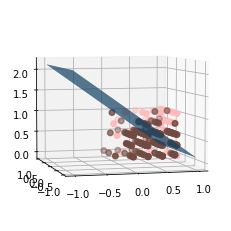

In [12]:
# Internet  Online_mode  Study

fig = plt.figure()
xx=3
yy=4
zz=8
ax  = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_syn_training[y_syn_training==1][:, xx], X_syn_training[y_syn_training==1][:, yy], X_syn_training[y_syn_training==1][:, zz],color='#FFB9BA', marker='o', s=30, linewidth=1.5)
ax.scatter3D(X_syn_training[y_syn_training==0][:, xx], X_syn_training[y_syn_training==0][:, yy], X_syn_training[y_syn_training==0][:, zz],color='#714A41', marker='o', s=30, linewidth=1.5)



X1_PRO=np1.c_[X_syn_training[:, xx], X_syn_training[:, yy], X_syn_training[:, zz]]

model = svm.SVC(kernel='linear', C=10)
Y1 = y_syn_training

clf = model.fit(X1_PRO, Y1)
print(clf)

z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]
tmp = np1.linspace(-1,1,30)
x,y = np1.meshgrid(tmp,tmp)
ax.plot_surface(x, y, z(x,y))

ax.view_init(5, -105)

y_pred=clf.predict(X1_PRO)
print("Accuracy of %.2f" %(metrics.accuracy_score(Y1, y_pred)*100))

SVC(C=10, kernel='linear')
Accuracy of 66.10


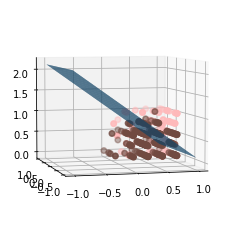

In [13]:
# Internet  doubts_online  Study

fig = plt.figure()
xx=3
yy=4
zz=9
ax  = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_syn_training[y_syn_training==1][:, xx], X_syn_training[y_syn_training==1][:, yy], X_syn_training[y_syn_training==1][:, zz],color='#FFB9BA', marker='o', s=30, linewidth=1.5)
ax.scatter3D(X_syn_training[y_syn_training==0][:, xx], X_syn_training[y_syn_training==0][:, yy], X_syn_training[y_syn_training==0][:, zz],color='#714A41', marker='o', s=30, linewidth=1.5)



X1_PRO=np1.c_[X_syn_training[:, xx], X_syn_training[:, yy], X_syn_training[:, zz]]

model = svm.SVC(kernel='linear', C=10)
Y1 = y_syn_training

clf = model.fit(X1_PRO, Y1)
print(clf)

z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]
tmp = np1.linspace(-1,1,30)
x,y = np1.meshgrid(tmp,tmp)
ax.plot_surface(x, y, z(x,y))

ax.view_init(5, -105)

y_pred=clf.predict(X1_PRO)
print("Accuracy of %.2f" %(metrics.accuracy_score(Y1, y_pred)*100))

SVC(C=10, kernel='linear')
Accuracy of 69.01


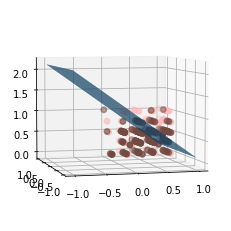

In [14]:
# Internet  Online_mode  Sleep

fig = plt.figure()
xx=3
yy=5
zz=8
ax  = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_syn_training[y_syn_training==1][:, xx], X_syn_training[y_syn_training==1][:, yy], X_syn_training[y_syn_training==1][:, zz],color='#FFB9BA', marker='o', s=30, linewidth=1.5)
ax.scatter3D(X_syn_training[y_syn_training==0][:, xx], X_syn_training[y_syn_training==0][:, yy], X_syn_training[y_syn_training==0][:, zz],color='#714A41', marker='o', s=30, linewidth=1.5)



X1_PRO=np1.c_[X_syn_training[:, xx], X_syn_training[:, yy], X_syn_training[:, zz]]

model = svm.SVC(kernel='linear', C=10)
Y1 = y_syn_training

clf = model.fit(X1_PRO, Y1)
print(clf)

z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]
tmp = np1.linspace(-1,1,30)
x,y = np1.meshgrid(tmp,tmp)
ax.plot_surface(x, y, z(x,y))

ax.view_init(5, -105)

y_pred=clf.predict(X1_PRO)
print("Accuracy of %.2f" %(metrics.accuracy_score(Y1, y_pred)*100))



SVC(C=10, kernel='linear')
Accuracy of 66.34


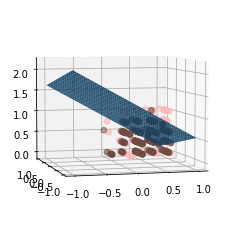

In [15]:
# Internet  doubts_online   Sleep

fig = plt.figure()
xx=3
yy=5
zz=9
ax  = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_syn_training[y_syn_training==1][:, xx], X_syn_training[y_syn_training==1][:, yy], X_syn_training[y_syn_training==1][:, zz],color='#FFB9BA', marker='o', s=30, linewidth=1.5)
ax.scatter3D(X_syn_training[y_syn_training==0][:, xx], X_syn_training[y_syn_training==0][:, yy], X_syn_training[y_syn_training==0][:, zz],color='#714A41', marker='o', s=30, linewidth=1.5)



X1_PRO=np1.c_[X_syn_training[:, xx], X_syn_training[:, yy], X_syn_training[:, zz]]

model = svm.SVC(kernel='linear', C=10)
Y1 = y_syn_training

clf = model.fit(X1_PRO, Y1)
print(clf)

z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]
tmp = np1.linspace(-1,1,30)
x,y = np1.meshgrid(tmp,tmp)
ax.plot_surface(x, y, z(x,y))

ax.view_init(5, -105)

y_pred=clf.predict(X1_PRO)
print("Accuracy of %.2f" %(metrics.accuracy_score(Y1, y_pred)*100))

SVC(C=10, kernel='linear')
Accuracy of 70.22


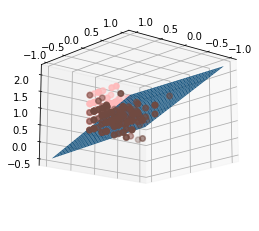

In [16]:
# Internet  Online_mode   Media

fig = plt.figure()
xx=3
yy=6
zz=8
ax  = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_syn_training[y_syn_training==1][:, xx], X_syn_training[y_syn_training==1][:, yy], X_syn_training[y_syn_training==1][:, zz],color='#FFB9BA', marker='o', s=30, linewidth=1.5)
ax.scatter3D(X_syn_training[y_syn_training==0][:, xx], X_syn_training[y_syn_training==0][:, yy], X_syn_training[y_syn_training==0][:, zz],color='#714A41', marker='o', s=30, linewidth=1.5)



X1_PRO=np1.c_[X_syn_training[:, xx], X_syn_training[:, yy], X_syn_training[:, zz]]

model = svm.SVC(kernel='linear', C=10)
Y1 = y_syn_training

clf = model.fit(X1_PRO, Y1)
print(clf)

z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]
tmp = np1.linspace(-1,1,30)
x,y = np1.meshgrid(tmp,tmp)
ax.plot_surface(x, y, z(x,y))

ax.view_init(-15, 50)

y_pred=clf.predict(X1_PRO)
print("Accuracy of %.2f" %(metrics.accuracy_score(Y1, y_pred)*100))

SVC(C=10, kernel='linear')
Accuracy of 67.07


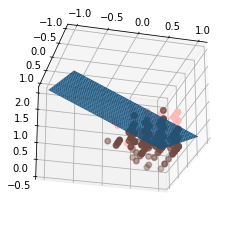

In [17]:
# Internet  doubts_online   Media

fig = plt.figure()
xx=3
yy=6
zz=9
ax  = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_syn_training[y_syn_training==1][:, xx], X_syn_training[y_syn_training==1][:, yy], X_syn_training[y_syn_training==1][:, zz],color='#FFB9BA', marker='o', s=30, linewidth=1.5)
ax.scatter3D(X_syn_training[y_syn_training==0][:, xx], X_syn_training[y_syn_training==0][:, yy], X_syn_training[y_syn_training==0][:, zz],color='#714A41', marker='o', s=30, linewidth=1.5)



X1_PRO=np1.c_[X_syn_training[:, xx], X_syn_training[:, yy], X_syn_training[:, zz]]

model = svm.SVC(kernel='linear', C=10)
Y1 = y_syn_training

clf = model.fit(X1_PRO, Y1)
print(clf)

z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]
tmp = np1.linspace(-1,1,30)
x,y = np1.meshgrid(tmp,tmp)
ax.plot_surface(x, y, z(x,y))

ax.view_init(-25, -105)

y_pred=clf.predict(X1_PRO)
print("Accuracy of %.2f" %(metrics.accuracy_score(Y1, y_pred)*100))

SVC(C=10, kernel='linear')
Accuracy of 69.01


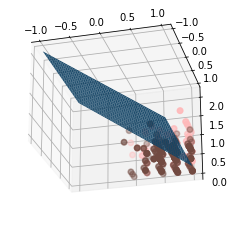

In [18]:
# Internet  Online_mode   Note_avant

fig = plt.figure()
xx=3
yy=7
zz=8
ax  = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_syn_training[y_syn_training==1][:, xx], X_syn_training[y_syn_training==1][:, yy], X_syn_training[y_syn_training==1][:, zz],color='#FFB9BA', marker='o', s=30, linewidth=1.5)
ax.scatter3D(X_syn_training[y_syn_training==0][:, xx], X_syn_training[y_syn_training==0][:, yy], X_syn_training[y_syn_training==0][:, zz],color='#714A41', marker='o', s=30, linewidth=1.5)



X1_PRO=np1.c_[X_syn_training[:, xx], X_syn_training[:, yy], X_syn_training[:, zz]]

model = svm.SVC(kernel='linear', C=10)
Y1 = y_syn_training

clf = model.fit(X1_PRO, Y1)
print(clf)

z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]
tmp = np1.linspace(-1,1,30)
x,y = np1.meshgrid(tmp,tmp)
ax.plot_surface(x, y, z(x,y))

ax.view_init(-25, -75)

y_pred=clf.predict(X1_PRO)
print("Accuracy of %.2f" %(metrics.accuracy_score(Y1, y_pred)*100))

SVC(C=10, kernel='linear')
Accuracy of 66.10


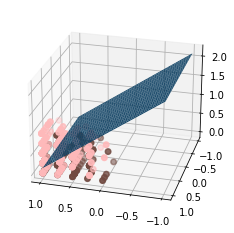

In [19]:
# Internet  doubts_online   Note_avant

fig = plt.figure()
xx=3
yy=7
zz=9
ax  = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_syn_training[y_syn_training==1][:, xx], X_syn_training[y_syn_training==1][:, yy], X_syn_training[y_syn_training==1][:, zz],color='#FFB9BA', marker='o', s=30, linewidth=1.5)
ax.scatter3D(X_syn_training[y_syn_training==0][:, xx], X_syn_training[y_syn_training==0][:, yy], X_syn_training[y_syn_training==0][:, zz],color='#714A41', marker='o', s=30, linewidth=1.5)



X1_PRO=np1.c_[X_syn_training[:, xx], X_syn_training[:, yy], X_syn_training[:, zz]]

model = svm.SVC(kernel='linear', C=10)
Y1 = y_syn_training

clf = model.fit(X1_PRO, Y1)
print(clf)

z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]
tmp = np1.linspace(-1,1,30)
x,y = np1.meshgrid(tmp,tmp)
ax.plot_surface(x, y, z(x,y))

ax.view_init(25, 105)

y_pred=clf.predict(X1_PRO)
print("Accuracy of %.2f" %(metrics.accuracy_score(Y1, y_pred)*100))